# Dylan Forsythe

## Research Interests

Since pursuing a degree in data science, I have been constantly introduced to various ways of observing and exploring data through tables, charts, graphs, and models. I very much enjoy the creating the visualizations of information because doing so helps me understand the data. Just by selecting different graphs and customizing them, theres an almost unlimited amount of stories that can be created and told. That is where the spark of my passion for data science begins. I wish to find the stories in the data that are not apparent without the steps involved with data analysis.
For this project, my interest is in learning about the popularities of some of the sports over the history that the sport has been played in the Olympics. So far, I'm mostly interested in winter olympic sports like snowboarding and skating because I recently learned how to snowboard, and figure skating simply because I think its pretty. I am hoping to find the information necessary to answer my questions by looking at how many participants are in the Olympics in each of these sports in each year.

# Research Question 1
### **How have the popularities of similar sports (i.e. amount of participants / competitors) changed over time in the Olympics?**

In [1]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Set the base theme for seaborn graphs

sns.set_theme(style='darkgrid',font_scale=1.15)

In [3]:
### Read raw data and save into seperate df's

OlympicResultsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv')
OlympicHostsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv')
OlympicMedalsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv')
OlympicAthletesDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_athletes.csv')

In [4]:
### Check the shape, and heads of each dataframe to get an idea of what information each one contains

#print(OlympicResultsDF.shape)
#OlympicResultsDF.head()

#print(OlympicHostsDF.shape)
#OlympicHostsDF.head()

#print(OlympicMedalsDF.shape)
#OlympicMedalsDF.head()

#print(OlympicAthletesDF.shape)
#OlympicAthletesDF.head()

In [5]:
### Merge all dataframes together to then isolate the information I want

Research_df_merged_full = pd.merge(OlympicResultsDF, OlympicAthletesDF, how='outer')
Research_df_merged_full = pd.merge(Research_df_merged_full, OlympicMedalsDF, how='outer')
Research_df_merged_full = pd.merge(Research_df_merged_full, OlympicHostsDF, left_on='slug_game', right_on='game_slug')
Research_df_merged_full

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,bio,event_gender,participant_title,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165939,Tennis,doubles men,athens-1896,GameTeam,SILVER,NaN,NaN,NaN,Greece,GR,...,NaN,Men,Greece team #1,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896
165940,Tennis,doubles men,athens-1896,GameTeam,GOLD,NaN,NaN,NaN,MIX,NaN,...,NaN,Men,Mixed team #2,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896
165941,Tennis,doubles men,athens-1896,GameTeam,GOLD,NaN,NaN,NaN,MIX,NaN,...,NaN,Men,Mixed team #2,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896
165942,Tennis,doubles men,athens-1896,GameTeam,BRONZE,NaN,NaN,NaN,MIX,NaN,...,NaN,Men,Mixed team #1,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896


In [6]:
Research1_df_merged_filtered = Research_df_merged_full.drop(columns=['medal_type','first_game','athlete_full_name',
                                                      'game_slug','athletes','value_unit','value_type',
                                                      'games_participations','athlete_url','participant_type',
                                                      'rank_equal','rank_position','event_gender','country_name',
                                                      'country_code','country_3_letter_code','athlete_year_birth','bio',
                                                      'athlete_medals','participant_title','game_end_date',
                                                      'game_start_date','game_season','slug_game'])
Research1_df_merged_filtered

,discipline_title,event_title,game_location,game_name,game_year
0,Curling,Mixed Doubles,China,Beijing 2022,2022
1,Curling,Mixed Doubles,China,Beijing 2022,2022
2,Curling,Mixed Doubles,China,Beijing 2022,2022
3,Curling,Mixed Doubles,China,Beijing 2022,2022
4,Curling,Mixed Doubles,China,Beijing 2022,2022
...,...,...,...,...,...
165939,Tennis,doubles men,Greece,Athens 1896,1896
165940,Tennis,doubles men,Greece,Athens 1896,1896
165941,Tennis,doubles men,Greece,Athens 1896,1896
165942,Tennis,doubles men,Greece,Athens 1896,1896


In [7]:
### To see the exact name of the sports in the whole dataframe:

Research1_df_merged_filtered.discipline_title.unique()

array(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Ice Hockey',
       'Biathlon', 'Alpine Skiing', 'Cross Country Skiing',
       'Speed skating', 'Nordic Combined', 'Bobsleigh', 'Skeleton',
       'Shooting', 'Diving', 'Canoe Sprint', 'Football',
       'Artistic Swimming', 'Handball', 'Rugby Sevens', 'Triathlon',
       'Table Tennis', 'Volleyball', 'Basketball', 'Cycling Track',
       'Fencing', 'Badminton', 'Water Polo', 'Tennis',
       'Artistic Gymnastics', 'Judo', 'Archery', 'Baseball/Softball',
       'Equestrian', 'Athletics', 'Swimming', 'Sailing', 'Rowing',
       '3x3 Basketball', 'Rhythmic Gymnastics', 'Hockey',
       'Beach Volleyball', 'Skateboarding', 'Cycling Mountain Bike',
       'Cycling Road', 'Boxing', 'Cycling BMX Racing', 'Surfing',
       'Canoe Slalom', 'Marathon Swimming', 'Trampoline Gymnastics',
       'Taekwondo', 'Sport Climbing', 'Wrestling', 'Golf',
       'Cycling BMX Fre

In [58]:
def sportpopularity(data, *args):
    """
    Returns a dataframe with only the passed-in sports.
    
    Parameters:
    -----------
    data:
        The dataframe to extract information from.
        
    *args:
        Any number of sport names that you wish to look at.
        
    Returns
    -------
    Dataframe
    """
    
    sports = []
    for i in args:
        sports.append(i)
        
    isolated_sports_df = data[data['discipline_title'].isin(sports)]
    
    isolated_sports_df = isolated_sports_df.rename(columns={'discipline_title' : 'Sport',
                                  'event_title' : 'Sporting Event Name',
                                  'game_location' : 'Olympic Host',
                                  'game_name' : 'Olympic Name',
                                  'game_year' : 'Year'})
    isolated_sports_df = isolated_sports_df.reset_index(drop=True)
    
    return isolated_sports_df

In [59]:
### Since we only want to look at the sports of Snowboarding and each skiing discipline, I want to make a dataframe 
### containing only these sports

Snow_and_Ski_df = sportpopularity(Research1_df_merged_filtered, 'Snowboard','Biathlon', 'Freestyle Skiing', 'Ski Jumping', 
                                  'Alpine Skiing', 'Cross Country Skiing', 'Nordic Combined')
Snow_and_Ski_df

,Sport,Sporting Event Name,Olympic Host,Olympic Name,Year
0,Freestyle Skiing,Mixed Team Aerials,China,Beijing 2022,2022
1,Freestyle Skiing,Mixed Team Aerials,China,Beijing 2022,2022
2,Freestyle Skiing,Mixed Team Aerials,China,Beijing 2022,2022
3,Freestyle Skiing,Mixed Team Aerials,China,Beijing 2022,2022
4,Freestyle Skiing,Mixed Team Aerials,China,Beijing 2022,2022
...,...,...,...,...,...
31526,Ski Jumping,Normal Hill Individual men,France,Chamonix 1924,1924
31527,Ski Jumping,Normal Hill Individual men,France,Chamonix 1924,1924
31528,Ski Jumping,Normal Hill Individual men,France,Chamonix 1924,1924
31529,Ski Jumping,Normal Hill Individual men,France,Chamonix 1924,1924


In [61]:
Snow_and_Ski_grouped = Snow_and_Ski_df.groupby(by=['Year', 'Olympic Host', 'Sport'])[['Olympic Name']].count().reset_index()
Snow_and_Ski_grouped.rename(columns={'Olympic Name' : 'Number of Participants'}, inplace=True)
Snow_and_Ski_grouped

,Year,Olympic Host,Sport,Number of Participants
0,1924,France,Cross Country Skiing,91
1,1924,France,Nordic Combined,37
2,1924,France,Ski Jumping,40
3,1928,Switzerland,Cross Country Skiing,91
4,1928,Switzerland,Nordic Combined,35
...,...,...,...,...
121,2022,China,Cross Country Skiing,736
122,2022,China,Freestyle Skiing,331
123,2022,China,Nordic Combined,102
124,2022,China,Ski Jumping,170


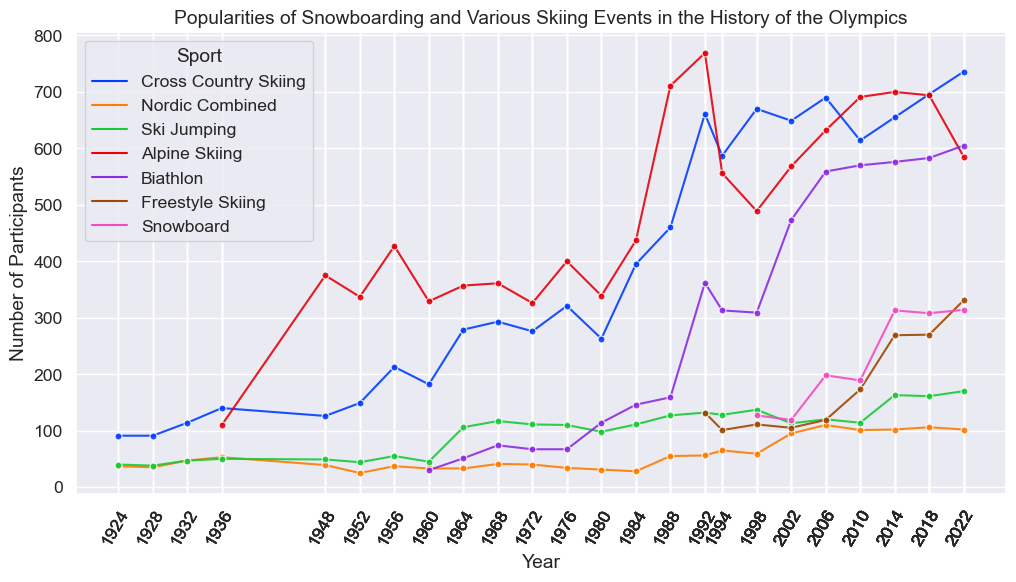

In [67]:
plt.figure(figsize=(12, 6))
RQ1_plot1 = sns.lineplot(data = Snow_and_Ski_grouped, x='Year', y= 'Number of Participants', 
                        alpha= 0.9, hue= 'Sport', marker='.', markersize=10, palette='bright')
RQ1_plot1.set_xticks(Snow_and_Ski_grouped['Year'])
RQ1_plot1.set_xticklabels(RQ1_bar1.get_xticklabels(), rotation=60, ha= 'right', rotation_mode= 'anchor')
RQ1_plot1.set(title="Popularities of Snowboarding and Various Skiing Events in the History of the Olympics")
plt.legend(loc='upper left', title= 'Sport')
None

# Insights for Question 1
1. There is no initial data for these sports during the years 1940 and 1944, and these years are missing from the list. This is because World War 2 was occuring during these dates.
1. There was a large increase in popularity for Alpine Skiing between 1936 and 1948, and again from 1984 to 1988.
1. Cross Country Skiing also had a large increase in popularity between 1984 and 1988.
1. Snowboarding was only introduced into the Olympics in 1998 in Nagano, Japan.
1. The Winter Olympics were held in 1992 and 1994 (2-year difference as opposed to the normal 4 years).

---

In [64]:
## I will call my function again but with different sports and try to figure out a different graph for it to show variety

Skating_df = sportpopularity(Research1_df_merged_filtered, 'Short Track Speed Skating', 'Figure skating', 'Speed skating')

In [78]:
Skating_df_grouped = Skating_df.groupby(by=['Year', 'Olympic Host', 'Sport'])[['Olympic Name']].count().reset_index()
Skating_df_grouped.rename(columns={'Olympic Name' : 'Number of Participants'}, inplace=True)
#Skating_df_grouped

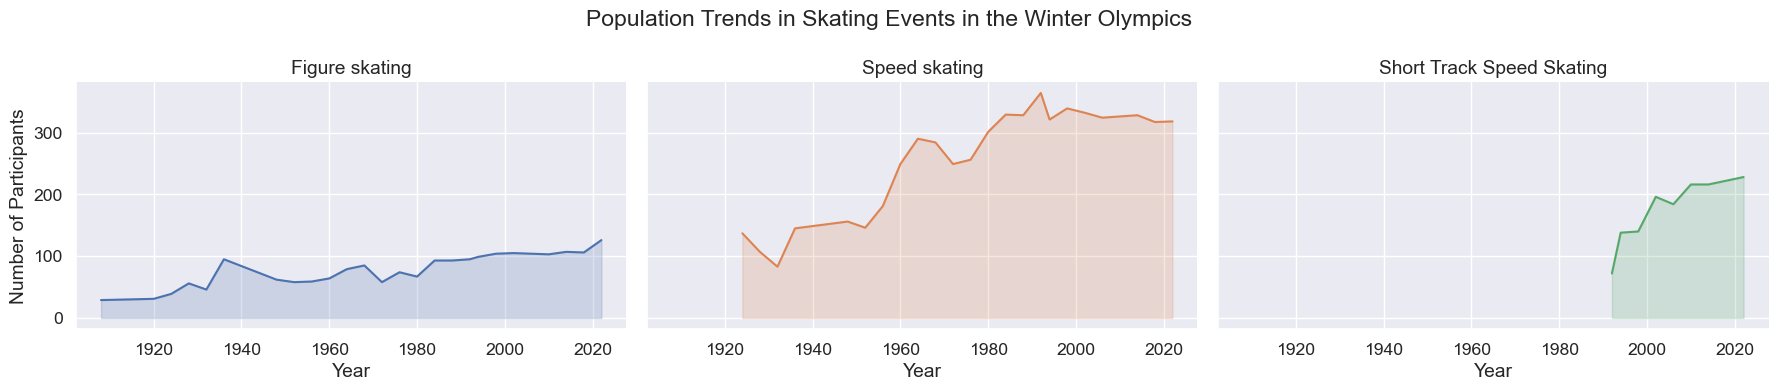

In [128]:
RQ1_facet = sns.FacetGrid(Skating_df_grouped, col='Sport', hue='Sport', col_wrap=3, height=4, aspect=1.5)
RQ1_facet.map(plt.plot, 'Year', 'Number of Participants')
RQ1_facet = RQ1_facet.map(plt.fill_between, 'Year', 'Number of Participants', alpha=0.2).set_titles("{col_name}")
plt.subplots_adjust(top= 0.8)

RQ1_facet = RQ1_facet.fig.suptitle('Population Trends in Skating Events in the Winter Olympics')

# Insights / Observations
1. There appears to be a nearly 100% increase in participants in Short Track Speed Skating between 1992 and 1994, but also we can see that the number of participants in Speed skating decreased over the same years. This could suggest a negative correlation between the two events.
1. The number of people entering Speed Skating has slowly decreased over the past 20 years.
1. Figure Skating has had the most consistent number of competitors over the history of these three sports.


---

# Research Question 2

### **How many athletes obtained a medal in their first appearance in the Olympics?**

In [143]:
Research2_df = Research_df_merged_full.copy()
#print(Research2_df.columns)

Research2_df.drop(columns=['discipline_title', 'game_slug', 'slug_game', 'event_title', 'participant_type', 'athletes', 'rank_equal', 
                           'rank_position', 'country_name', 'country_code', 'country_3_letter_code', 'athlete_url',
                           'value_unit', 'value_type', 'games_participations', 'athlete_year_birth', 'athlete_medals',
                           'bio', 'event_gender', 'participant_title', 'game_end_date', 'game_start_date', 'game_season'], inplace=True)
Research2_df.dropna().reset_index(drop=True)

,medal_type,athlete_full_name,first_game,game_location,game_name,game_year
0,BRONZE,Ikuma HORISHIMA,PyeongChang 2018,China,Beijing 2022,2022
1,SILVER,Mikael KINGSBURY,Sochi 2014,China,Beijing 2022,2022
2,GOLD,Walter WALLBERG,PyeongChang 2018,China,Beijing 2022,2022
3,GOLD,Nico PORTEOUS,PyeongChang 2018,China,Beijing 2022,2022
4,SILVER,David WISE,Sochi 2014,China,Beijing 2022,2022
...,...,...,...,...,...,...
14189,SILVER,Pavlos PAVLIDIS,Athens 1896,Greece,Athens 1896,1896
14190,GOLD,Pantelis KARASEVDAS,Athens 1896,Greece,Athens 1896,1896
14191,GOLD,John BOLAND,Athens 1896,Greece,Athens 1896,1896
14192,BRONZE,Konstantinos PASPATIS,Athens 1896,Greece,Athens 1896,1896


In [185]:
### Then by looking at the rows where the 'first_game' column and the 'game_name' column match values, 
### we find the participants that won any medal in their first appearance.

RQ2_First_medal = Research2_df[Research2_df['first_game'] == Research2_df['game_name']]
RQ2_First_medal= RQ2_First_medal.dropna().reset_index(drop=True)
RQ2_First_medal.rename(columns={'medal_type' : 'Medal Won',
                                'athlete_full_name' : 'Athlete Name',
                                'first_game' : 'First Game',
                                'game_location' : 'Host Country',
                                'game_name' : 'Game Name',
                                'game_year' : 'Year'}, inplace=True)
RQ2_First_medal

,Medal Won,Athlete Name,First Game,Host Country,Game Name,Year
0,GOLD,Birk RUUD,Beijing 2022,China,Beijing 2022,2022
1,SILVER,Colby STEVENSON,Beijing 2022,China,Beijing 2022,2022
2,GOLD,Ryan REGEZ,Beijing 2022,China,Beijing 2022,2022
3,GOLD,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
4,GOLD,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
...,...,...,...,...,...,...
7990,SILVER,Pavlos PAVLIDIS,Athens 1896,Greece,Athens 1896,1896
7991,GOLD,Pantelis KARASEVDAS,Athens 1896,Greece,Athens 1896,1896
7992,GOLD,John BOLAND,Athens 1896,Greece,Athens 1896,1896
7993,BRONZE,Konstantinos PASPATIS,Athens 1896,Greece,Athens 1896,1896


In [186]:
round(len(RQ2_First_medal) / len(Research_df_merged_full), 3) *100

4.8

In [187]:
Gold = RQ2_First_medal[RQ2_First_medal['Medal Won'] == 'GOLD']
Gold

,Medal Won,Athlete Name,First Game,Host Country,Game Name,Year
0,GOLD,Birk RUUD,Beijing 2022,China,Beijing 2022,2022
2,GOLD,Ryan REGEZ,Beijing 2022,China,Beijing 2022,2022
3,GOLD,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
4,GOLD,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
21,GOLD,Yiming SU,Beijing 2022,China,Beijing 2022,2022
...,...,...,...,...,...,...
7985,GOLD,Alfred HAJOS,Athens 1896,Greece,Athens 1896,1896
7986,GOLD,Ioannis MALOKINIS,Athens 1896,Greece,Athens 1896,1896
7989,GOLD,Sumner PAINE,Athens 1896,Greece,Athens 1896,1896
7991,GOLD,Pantelis KARASEVDAS,Athens 1896,Greece,Athens 1896,1896


In [159]:
Silver = RQ2_First_medal[RQ2_First_medal['Medal Won'] == 'SILVER']
Silver

,Medal Won,Athlete Name,First Game,Host Country,Game Name,Year
1,SILVER,Colby STEVENSON,Beijing 2022,China,Beijing 2022,2022
5,SILVER,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
9,SILVER,Hanna HUSKOVA,Beijing 2022,China,Beijing 2022,2022
14,SILVER,Steven DUBOIS,Beijing 2022,China,Beijing 2022,2022
15,SILVER,Konstantin IVLIEV,Beijing 2022,China,Beijing 2022,2022
...,...,...,...,...,...,...
7982,SILVER,Antonios PEPANOS,Athens 1896,Greece,Athens 1896,1896
7983,SILVER,Otto HERSCHMANN,Athens 1896,Greece,Athens 1896,1896
7988,SILVER,Sumner PAINE,Athens 1896,Greece,Athens 1896,1896
7990,SILVER,Pavlos PAVLIDIS,Athens 1896,Greece,Athens 1896,1896


In [160]:
Bronze = RQ2_First_medal[RQ2_First_medal['Medal Won'] == 'BRONZE']
Bronze

,Medal Won,Athlete Name,First Game,Host Country,Game Name,Year
6,BRONZE,Kelly SILDARU,Beijing 2022,China,Beijing 2022,2022
7,BRONZE,Anastasiia SMIRNOVA,Beijing 2022,China,Beijing 2022,2022
8,BRONZE,Daniela MAIER,Beijing 2022,China,Beijing 2022,2022
10,BRONZE,Megan NICK,Beijing 2022,China,Beijing 2022,2022
11,BRONZE,Rachel KARKER,Beijing 2022,China,Beijing 2022,2022
...,...,...,...,...,...,...
7967,BRONZE,Petros PERSAKIS,Athens 1896,Greece,Athens 1896,1896
7976,BRONZE,Léon FLAMENG,Athens 1896,Greece,Athens 1896,1896
7978,BRONZE,Edward BATTEL,Athens 1896,Greece,Athens 1896,1896
7987,BRONZE,Dimitrios DRIVAS,Athens 1896,Greece,Athens 1896,1896


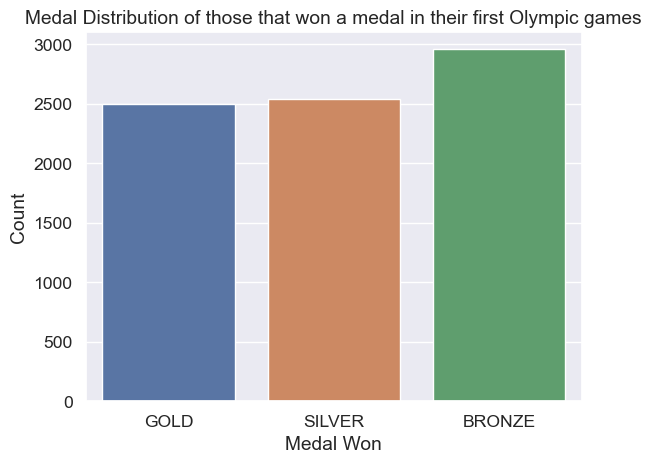

In [222]:
RQ2_plot = sns.countplot(RQ2_First_medal, x= 'Medal Won')
RQ2_plot.set(title= 'Medal Distribution of those that won a medal in their first Olympic games', ylabel='Count')
None

# Insights / Observations
1. After dropping all NaN values in my RQ2_First_medal dataframe, I'm left with 7995 rows meaning there are 7995 Olympic athletes to win an Olympic medal in their first appearance. Based on the number of rows in the unfiltered dataset, the percentage of competitors to win a medal in their first appearance is 4.8%.
1. The distribution is fairly close which is a little unexpected. I expected to see far less gold medals than silver and bronze medals.

---

# Conclusions
